In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# from pmdarima import auto_arima

from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, GRU, concatenate, Input, Attention, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.preprocessing import MinMaxScaler

# from sktime.forecasting.naive import NaiveForecaster
# from sktime.utils.plotting import plot_series
# from sktime.forecasting.base import ForecastingHorizon
# from sktime.forecasting.exp_smoothing import ExponentialSmoothing
# from sktime.forecasting.ets import AutoETS

from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_excel('2022_day_ru.xls')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Дата,Дирхам ОАЭ (AED),NaN,Армянский драм (AMD),NaN,Австралийский доллар (AUD),NaN,Болгарский лев (BGN),NaN,Бразильский реал (BRL),...,Турецкая лира (TRY),NaN,Гривна (UAH),NaN,Доллар США (USD),NaN,Донг (VND),NaN,СДР (Специальные права заимствования) (XDR),NaN
3,NaN,Кол-во единиц иностранной валюты,Курс,Кол-во единиц иностранной валюты,Курс,Кол-во единиц иностранной валюты,Курс,Кол-во единиц иностранной валюты,Курс,Кол-во единиц иностранной валюты,...,Кол-во единиц иностранной валюты,Курс,Кол-во единиц иностранной валюты,Курс,Кол-во единиц иностранной валюты,Курс,Кол-во единиц иностранной валюты,Курс,Кол-во единиц иностранной валюты,Курс
4,2022-01-01 00:00:00,NaN,NaN,1000,5.323,1,1.8492,1,1.4723,NaN,...,10,1.9663,100,9.3319,1,2.5481,NaN,NaN,1,3.5663


In [4]:
df = df.drop([0, 1, 2, 3])
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
4,2022-01-01 00:00:00,NaN,NaN,1000,5.323,1,1.8492,1,1.4723,NaN,...,10,1.9663,100,9.3319,1,2.5481,NaN,NaN,1,3.5663
5,2022-01-02 00:00:00,NaN,NaN,1000,5.323,1,1.8492,1,1.4723,NaN,...,10,1.9663,100,9.3319,1,2.5481,NaN,NaN,1,3.5663
6,2022-01-03 00:00:00,NaN,NaN,1000,5.323,1,1.8492,1,1.4723,NaN,...,10,1.9663,100,9.3319,1,2.5481,NaN,NaN,1,3.5663
7,2022-01-04 00:00:00,NaN,NaN,1000,5.339,1,1.8567,1,1.4853,NaN,...,10,1.9037,100,9.3796,1,2.559,NaN,NaN,1,3.5816
8,2022-01-05 00:00:00,NaN,NaN,1000,5.3349,1,1.8564,1,1.4874,NaN,...,10,1.9437,100,9.4293,1,2.5741,NaN,NaN,1,3.6063


In [5]:
df = df['Unnamed: 58']
df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 365 entries, 4 to 368
Series name: Unnamed: 58
Non-Null Count  Dtype 
--------------  ----- 
365 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [ ]:
df = df.astype('float32')
df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 365 entries, 4 to 368
Series name: Unnamed: 58
Non-Null Count  Dtype  
--------------  -----  
365 non-null    float32
dtypes: float32(1)
memory usage: 1.6 KB


<Axes: >

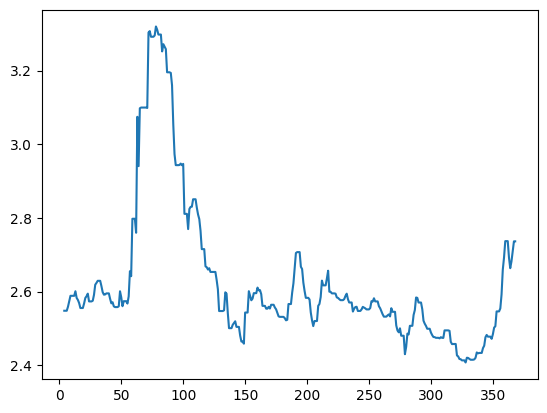

In [ ]:
df.plot()

<Axes: >

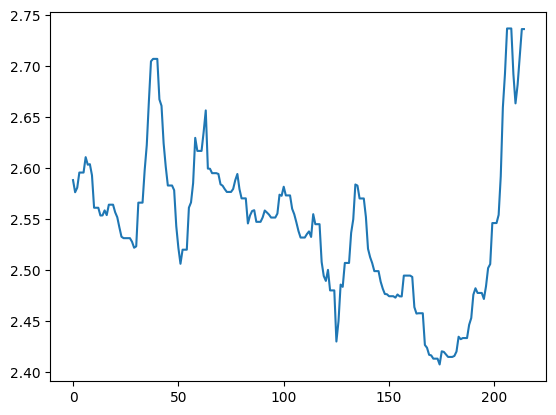

In [6]:
df = df[150 : ].reset_index(drop = True)
df.plot()

In [7]:
df_2023 = pd.read_excel('2023_day_ru.xls')
df_2023 = df_2023.drop([0, 1, 2, 3])
df_2023 = df_2023['Unnamed: 58']
df_2023 = df_2023.astype('float32')
df_2023.head()

4    2.7364
5    2.7364
6    2.7364
7    2.7088
8    2.7274
Name: Unnamed: 58, dtype: float32

In [8]:
df = pd.concat([df, df_2023]).reset_index(drop = True)
df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 580 entries, 0 to 579
Series name: Unnamed: 58
Non-Null Count  Dtype 
--------------  ----- 
580 non-null    object
dtypes: object(1)
memory usage: 4.7+ KB


In [9]:
df_2024 = pd.read_excel('2024_day_ru.xls')
df_2024 = df_2024.drop([0, 1, 2, 3])
df_2024 = df_2024['Unnamed: 58']
df_2024 = df_2024.astype('float32')
df = pd.concat([df, df_2024]).reset_index(drop = True)
df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 679 entries, 0 to 678
Series name: Unnamed: 58
Non-Null Count  Dtype 
--------------  ----- 
679 non-null    object
dtypes: object(1)
memory usage: 5.4+ KB


<Axes: >

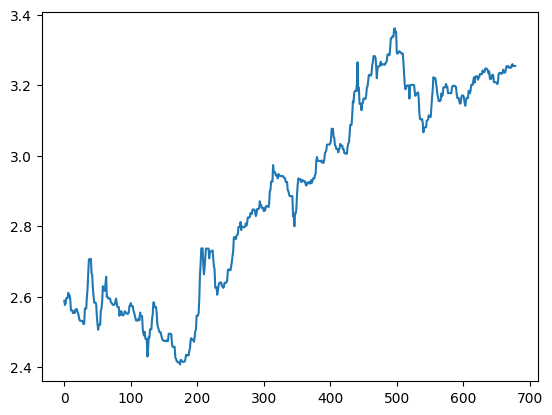

In [10]:
df.plot()

In [ ]:
def get_metrics(y_true, y_pred):
    print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
    print(f'medAE: {median_absolute_error(y_true, y_pred)}')
    print(f'MSE: {mean_squared_error(y_true, y_pred)}')
    print(f'MSLE: {mean_squared_log_error(y_true, y_pred)}')
    print(f'MAPE: {mean_absolute_percentage_error(y_true, y_pred)}')

In [ ]:
msk = (df.index < len(df) - int(0.2 * len(df)))
df_train = df[msk].copy()
df_test = df[~msk].copy()

In [ ]:
fh = ForecastingHorizon(df_test.index, is_relative = False)
fh

ForecastingHorizon([544, 545, 546, 547, 548, 549, 550, 551, 552, 553,
       ...
       669, 670, 671, 672, 673, 674, 675, 676, 677, 678],
      dtype='int64', length=135, is_relative=False)

MAE: 0.12000676989555359
medAE: 0.125
MSE: 0.015996336936950684
MSLE: 0.0009285415872000158
MAPE: 0.03734495863318443


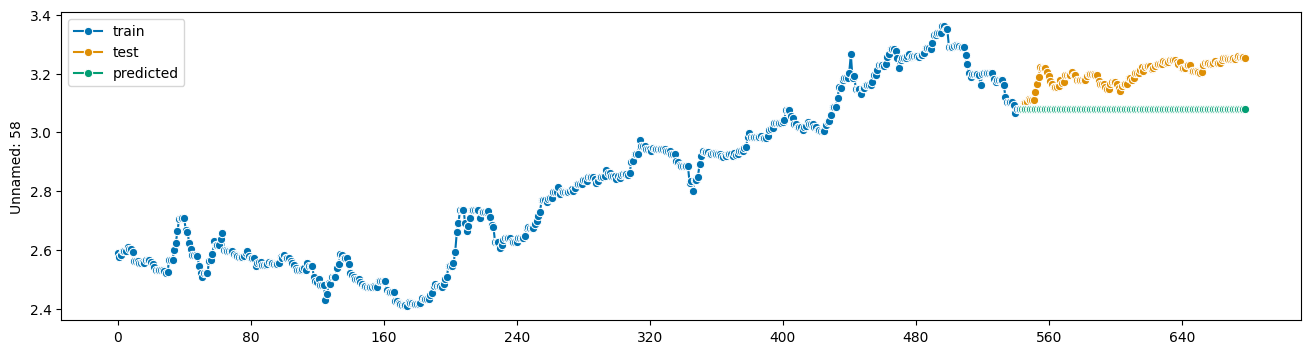

In [ ]:
forecaster = NaiveForecaster(strategy = 'last')
forecaster.fit(df_train)

y_pred = forecaster.predict(fh)

plot_series(df_train, df_test, y_pred, labels = ['train', 'test', 'predicted'])
get_metrics(df_test, y_pred)

MAE: 0.06683358550071716
medAE: 0.0677497386932373
MSE: 0.00553309079259634
MSLE: 0.000316229386953637
MAPE: 0.020769299939274788


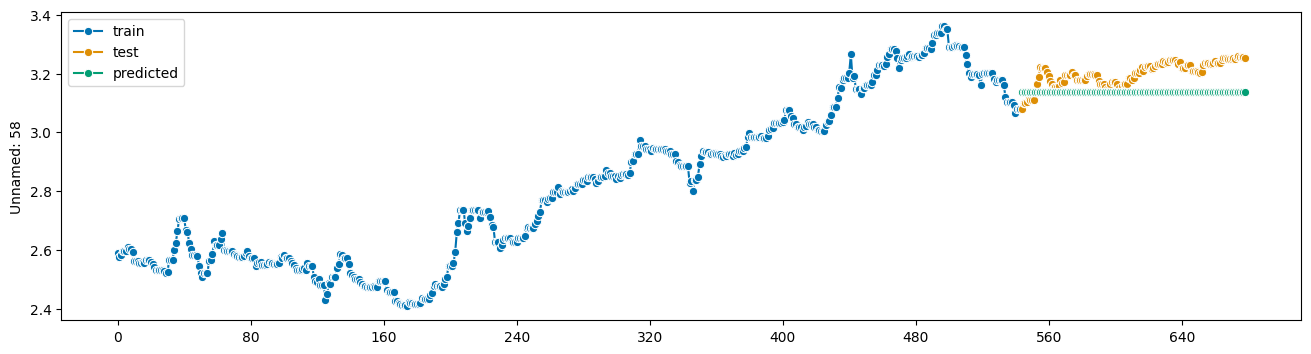

In [ ]:
forecaster = NaiveForecaster(strategy = 'mean', window_length = 20)
forecaster.fit(df_train)

y_pred = forecaster.predict(fh)

plot_series(df_train, df_test, y_pred, labels = ['train', 'test', 'predicted'])
get_metrics(df_test, y_pred)

MAE: 0.11408298462629318
medAE: 0.11750006675720215
MSE: 0.014704267494380474
MSLE: 0.0008526997407898307
MAPE: 0.03549764305353165


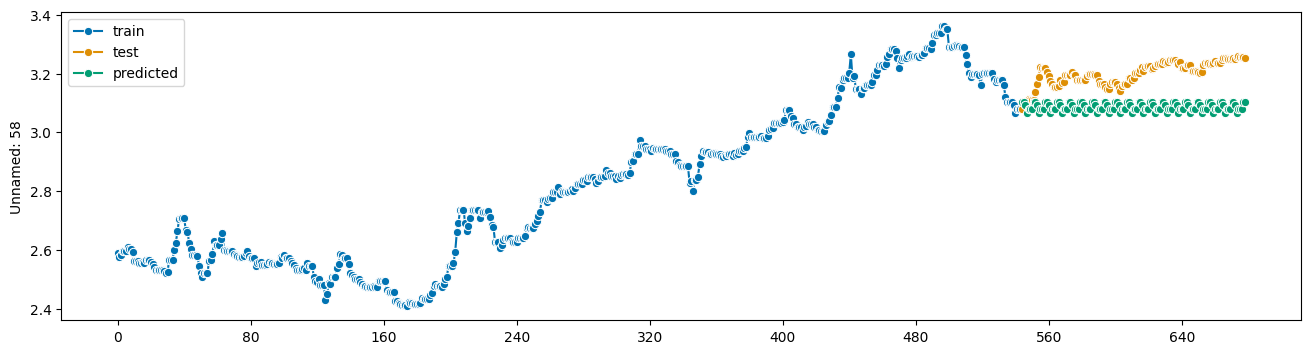

In [ ]:
forecaster = NaiveForecaster(strategy = 'last', sp = 7)
forecaster.fit(df_train)

y_pred = forecaster.predict(fh)

plot_series(df_train, df_test, y_pred, labels = ['train', 'test', 'predicted'])
get_metrics(df_test, y_pred)

MAE: 0.05748817324638367
medAE: 0.04890012741088867
MSE: 0.005395522806793451
MSLE: 0.0003113169514108449
MAPE: 0.01793276146054268


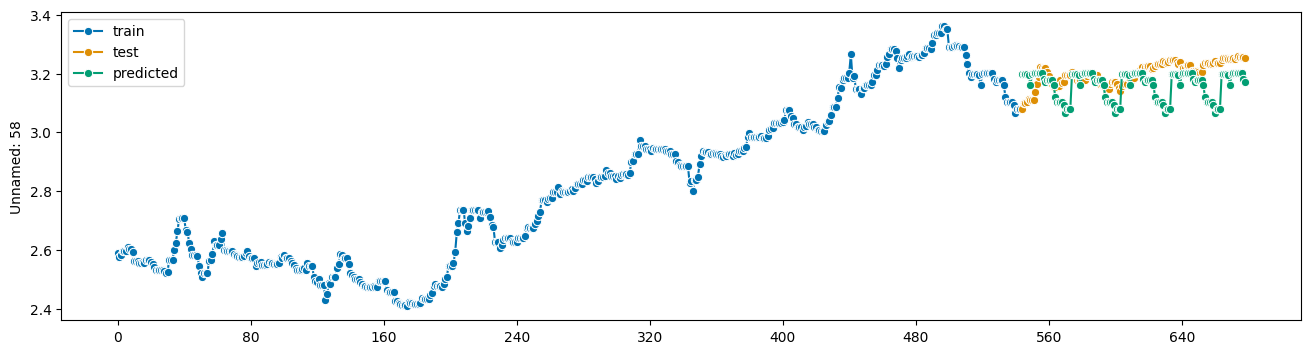

In [ ]:
forecaster = NaiveForecaster(strategy = 'last', sp = 30)
forecaster.fit(df_train)

y_pred = forecaster.predict(fh)

plot_series(df_train, df_test, y_pred, labels = ['train', 'test', 'predicted'])
get_metrics(df_test, y_pred)

MAE: 0.12000673504819556
medAE: 0.12499995409697373
MSE: 0.015996326297404745
MSLE: 0.0009285398306107574
MAPE: 0.037344942987094225


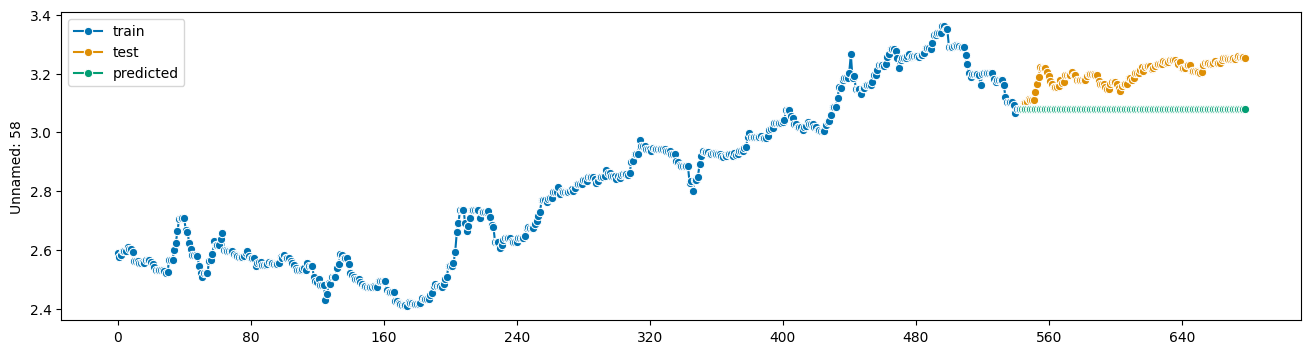

In [ ]:
forecaster = ExponentialSmoothing()
forecaster.fit(df_train)

y_pred = forecaster.predict(fh)

plot_series(df_train, df_test, y_pred, labels = ['train', 'test', 'predicted'])
get_metrics(df_test, y_pred)

MAE: 0.05839488473499899
medAE: 0.056974721730707056
MSE: 0.004003637561542127
MSLE: 0.000229949674463396
MAPE: 0.018201668773329766


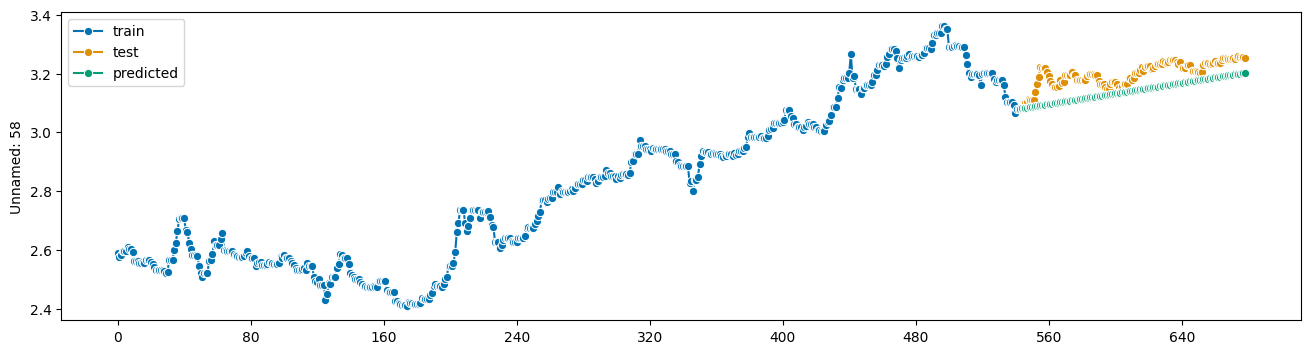

In [ ]:
forecaster = ExponentialSmoothing(trend = 'add')
forecaster.fit(df_train)

y_pred = forecaster.predict(fh)

plot_series(df_train, df_test, y_pred, labels = ['train', 'test', 'predicted'])
get_metrics(df_test, y_pred)

MAE: 0.12304269066912489
medAE: 0.12804054192633485
MSE: 0.016750571732234786
MSLE: 0.0009731387767133051
MAPE: 0.03829286380692366


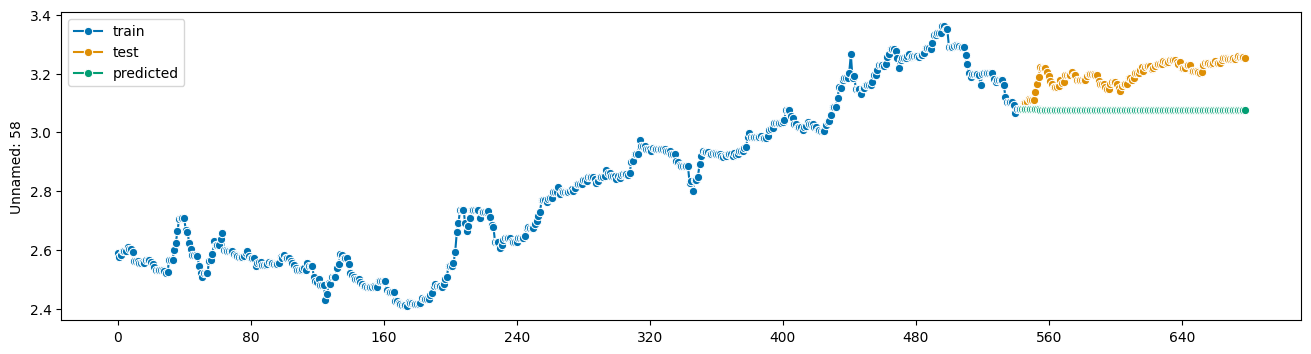

In [ ]:
forecaster = AutoETS(auto = True, n_jobs = -1, information_criterion = 'bic', sp = 30)
forecaster.fit(df_train)

y_pred = forecaster.predict(fh)

plot_series(df_train, df_test, y_pred, labels = ['train', 'test', 'predicted'])
get_metrics(df_test, y_pred)

In [ ]:
forecaster.get_params()

{'additive_only': False,
 'allow_multiplicative_trend': False,
 'auto': True,
 'bounds': None,
 'callback': None,
 'damped_trend': False,
 'dates': None,
 'disp': False,
 'error': 'add',
 'freq': None,
 'full_output': True,
 'ignore_inf_ic': True,
 'information_criterion': 'bic',
 'initial_level': None,
 'initial_seasonal': None,
 'initial_trend': None,
 'initialization_method': 'estimated',
 'maxiter': 1000,
 'missing': 'none',
 'n_jobs': -1,
 'random_state': None,
 'restrict': True,
 'return_params': False,
 'seasonal': None,
 'sp': 30,
 'start_params': None,
 'trend': None}

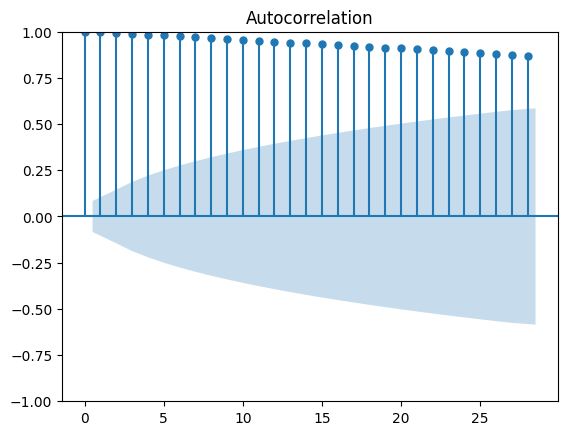

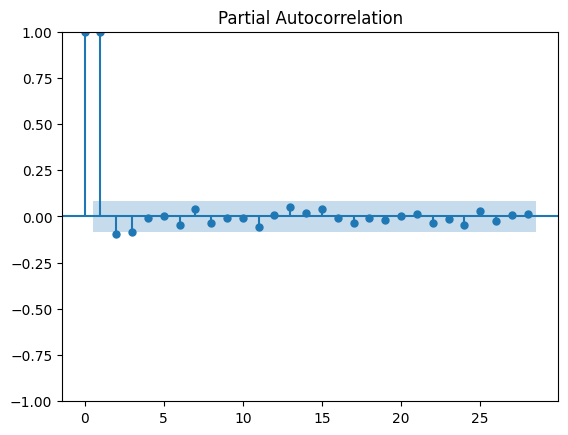

In [ ]:
acf_original = plot_acf(df_train)
plt.show()

pacf_original = plot_pacf(df_train)
plt.show()

In [ ]:
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.8079297888443572


In [ ]:
diff_data = df_train.diff()
diff_data = diff_data.dropna()
diff_data.isna().sum()

0

In [ ]:
adf_test = adfuller(diff_data)
print(f'p-value: {adf_test[1]}')

p-value: 3.3333472538338468e-15


<Axes: >

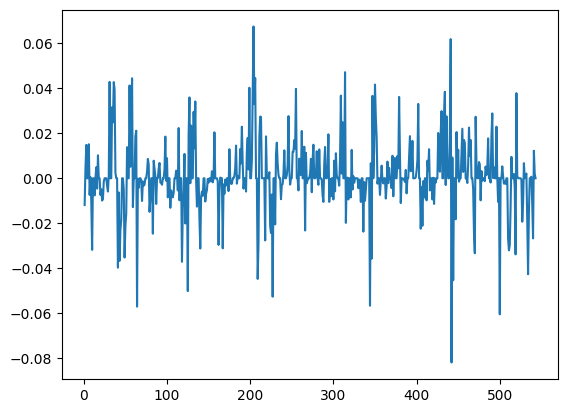

In [ ]:
diff_data.plot()

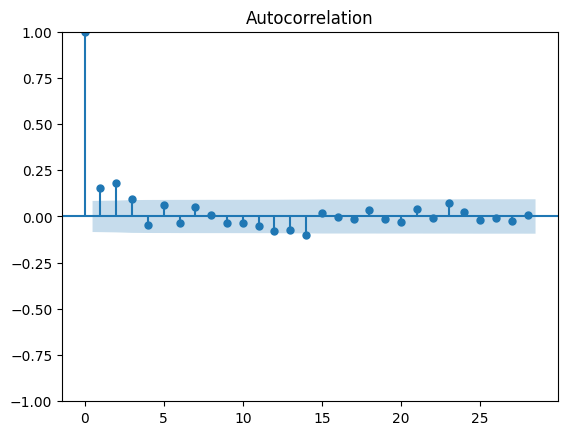

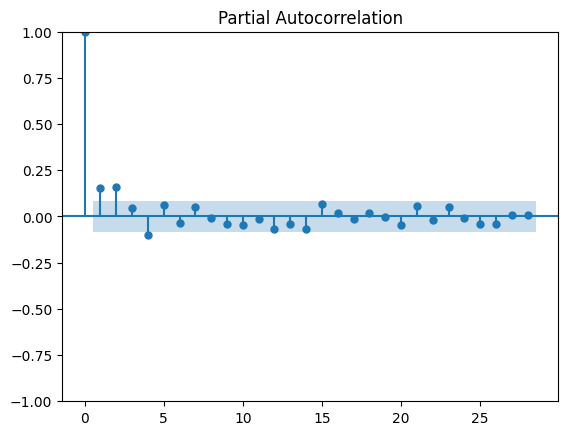

In [ ]:
acf_original = plot_acf(diff_data)
plt.show()

pacf_original = plot_pacf(diff_data)
plt.show()

In [ ]:
auto = auto_arima(df_train, seasonal = False, stepwise = False)
print(auto)
print(auto.summary())

 ARIMA(1,1,3)(0,0,0)[0] intercept
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  544
Model:               SARIMAX(1, 1, 3)   Log Likelihood                1515.661
Date:                Sat, 06 Apr 2024   AIC                          -3019.321
Time:                        19:08:53   BIC                          -2993.539
Sample:                             0   HQIC                         -3009.240
                                - 544                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.002      0.969      0.333      -0.002       0.005
ar.L1         -0.7251      0.125     -5.791      0.000      -0.971      -0.480
ma.L1          0.8

In [ ]:
auto = auto_arima(df_train, seasonal = True, stepwise = False)
print(auto)
print(auto.summary())

 ARIMA(1,1,3)(0,0,0)[1] intercept
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  544
Model:               SARIMAX(1, 1, 3)   Log Likelihood                1515.661
Date:                Sat, 06 Apr 2024   AIC                          -3019.321
Time:                        19:09:09   BIC                          -2993.539
Sample:                             0   HQIC                         -3009.240
                                - 544                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.002      0.969      0.333      -0.002       0.005
ar.L1         -0.7251      0.125     -5.791      0.000      -0.971      -0.480
ma.L1          0.8

In [ ]:
model = ARIMA(df_train, order = (1, 1, 3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Unnamed: 58   No. Observations:                  544
Model:                 ARIMA(1, 1, 3)   Log Likelihood                1515.079
Date:                Sat, 06 Apr 2024   AIC                          -3020.157
Time:                        19:09:10   BIC                          -2998.672
Sample:                             0   HQIC                         -3011.757
                                - 544                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7166      0.124     -5.794      0.000      -0.959      -0.474
ma.L1          0.8589      0.128      6.728      0.000       0.609       1.109
ma.L2          0.2783      0.042      6.685      0.0

/home/masikol/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


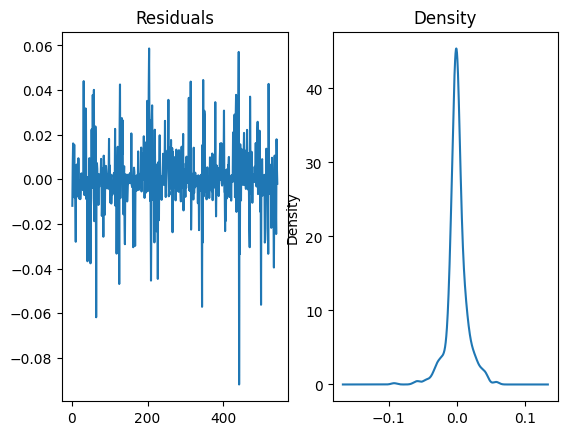

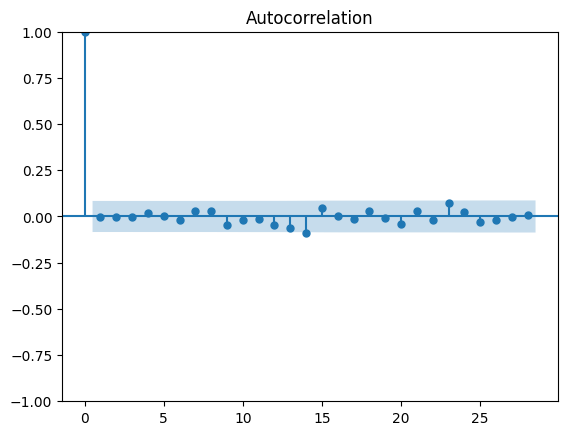

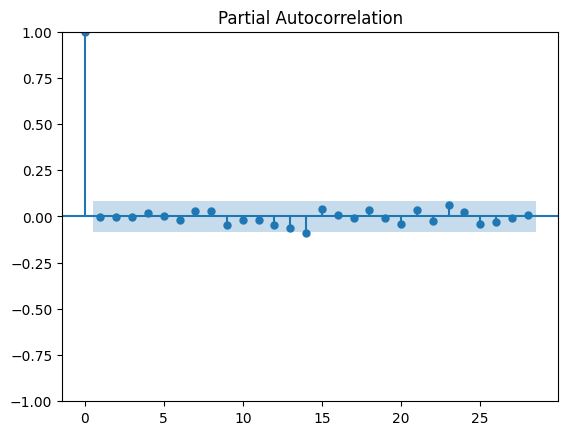

In [ ]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
residuals.plot(title = 'Residuals', ax = ax[0])
residuals.plot(title = 'Density', kind = 'kde', ax = ax[1])
plt.show()

acf_original = plot_acf(residuals)
plt.show()

pacf_original = plot_pacf(residuals)
plt.show()

Epoch 1/20
517/517 [==============================] - 18s 25ms/step - loss: 0.0097 - mae: 0.0720 - val_loss: 7.1194e-04 - val_mae: 0.0216
Epoch 2/20
517/517 [==============================] - 12s 23ms/step - loss: 0.0054 - mae: 0.0561 - val_loss: 6.1981e-04 - val_mae: 0.0188
Epoch 3/20
517/517 [==============================] - 14s 27ms/step - loss: 0.0032 - mae: 0.0431 - val_loss: 7.4732e-04 - val_mae: 0.0214
Epoch 4/20
517/517 [==============================] - 13s 24ms/step - loss: 0.0025 - mae: 0.0376 - val_loss: 3.3374e-04 - val_mae: 0.0134
Epoch 5/20
517/517 [==============================] - 12s 23ms/step - loss: 0.0017 - mae: 0.0321 - val_loss: 5.5585e-04 - val_mae: 0.0202
Epoch 6/20
517/517 [==============================] - 12s 23ms/step - loss: 0.0012 - mae: 0.0266 - val_loss: 0.0011 - val_mae: 0.0304
Epoch 7/20
517/517 [==============================] - 13s 26ms/step - loss: 0.0010 - mae: 0.0231 - val_loss: 0.0094 - val_mae: 0.0964


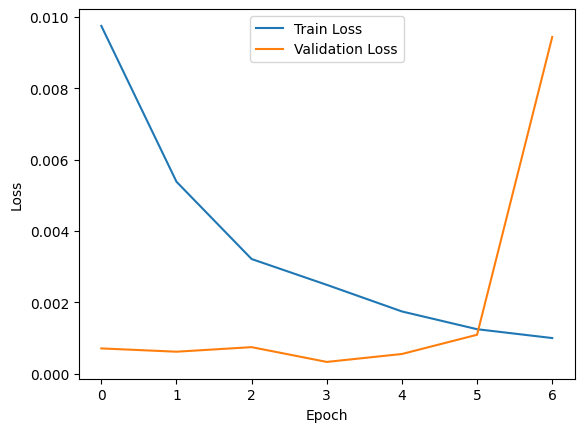

5/5 [==============================] - 1s 19ms/step


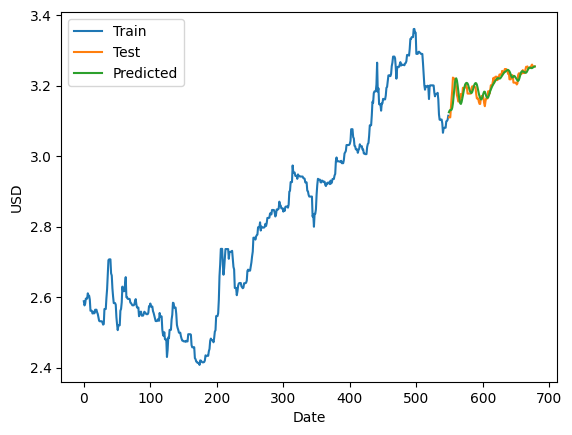

MAE: 0.012751285918056965
medAE: 0.01011037826538086
MSE: 0.00030323234386742115
MSLE: 1.7305417713942006e-05
MAPE: 0.00399424834176898


In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
data = scaler.fit_transform(df.values.reshape(-1, 1))

time_steps = 32
n_neurons = 64

X, y = [], []
for i in range(len(data) - time_steps):
    X.append(data[i : (i + time_steps), 0])
    y.append(data[i + time_steps, 0])

X, y = np.array(X), np.array(y)

split = int(0.8 * len(X))
X_train, X_test = X[ : split], X[split : ]
y_train, y_test = y[ : split], y[split : ]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units = n_neurons, return_sequences = True, input_shape = (time_steps, 1), activation = 'elu'))
model.add(LSTM(units = n_neurons, return_sequences = True, activation = 'elu'))
model.add(LSTM(units = n_neurons, return_sequences = True, activation = 'elu'))
model.add(LSTM(units = n_neurons, activation = 'elu'))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

history = model.fit(X_train, y_train, epochs = 20, batch_size = 1, validation_data = (X_test, y_test), callbacks = [early_stopping])

plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

predicted_values = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(df.index[ : -len(y_test)], df.iloc[ : -len(y_test)], label = 'Train')
plt.plot(df.index[-len(y_test) : ], df.iloc[-len(y_test) : ], label = 'Test')
plt.plot(df.index[-len(predicted_values) : ], predicted_values, label = 'Predicted')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

get_metrics(y_test, predicted_values.flatten())

Epoch 1/75
517/517 [==============================] - 37s 44ms/step - loss: 0.0111 - mae: 0.0751 - val_loss: 0.0026 - val_mae: 0.0425 - lr: 0.0010
Epoch 2/75
517/517 [==============================] - 21s 41ms/step - loss: 0.0049 - mae: 0.0545 - val_loss: 0.0178 - val_mae: 0.1312 - lr: 0.0010
Epoch 3/75
517/517 [==============================] - 19s 36ms/step - loss: 0.0028 - mae: 0.0414 - val_loss: 0.0024 - val_mae: 0.0448 - lr: 0.0010
Epoch 4/75
517/517 [==============================] - 19s 37ms/step - loss: 0.0018 - mae: 0.0327 - val_loss: 6.2301e-04 - val_mae: 0.0199 - lr: 0.0010
Epoch 5/75
517/517 [==============================] - 23s 44ms/step - loss: 0.0023 - mae: 0.0364 - val_loss: 2.7677e-04 - val_mae: 0.0126 - lr: 0.0010
Epoch 6/75
517/517 [==============================] - 27s 53ms/step - loss: 0.0012 - mae: 0.0267 - val_loss: 6.8557e-04 - val_mae: 0.0231 - lr: 0.0010
Epoch 7/75
517/517 [==============================] - 30s 58ms/step - loss: 8.9565e-04 - mae: 0.0225 - val

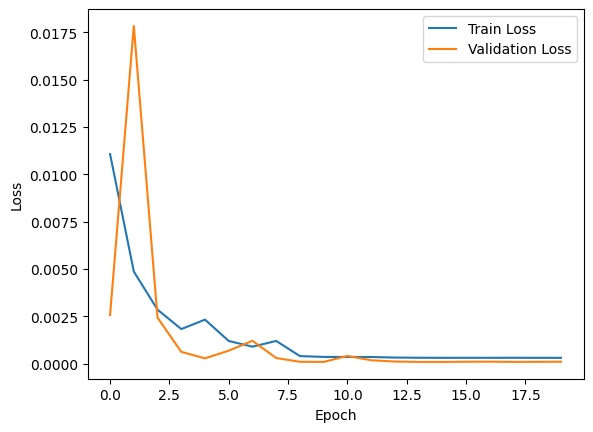

5/5 [==============================] - 1s 33ms/step


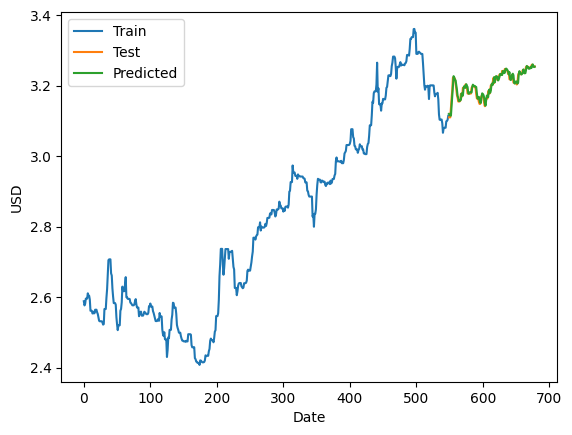

MAE: 0.006678848993033171
medAE: 0.004831910133361816
MSE: 8.137429540511221e-05
MSLE: 4.6363820729311556e-06
MAPE: 0.0020903742406517267


In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
data = scaler.fit_transform(df.values.reshape(-1, 1))

time_steps = 32
n_neurons = 64

X, y = [], []
for i in range(len(data) - time_steps):
    X.append(data[i : (i + time_steps), 0])
    y.append(data[i + time_steps, 0])

X, y = np.array(X), np.array(y)

split = int(0.8 * len(X))
X_train, X_test = X[ : split], X[split : ]
y_train, y_test = y[ : split], y[split : ]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units = n_neurons, return_sequences = True, input_shape = (time_steps, 1), activation = 'elu'))
model.add(LSTM(units = n_neurons, return_sequences = True, activation = 'elu'))
model.add(LSTM(units = n_neurons, return_sequences = True, activation = 'elu'))
model.add(LSTM(units = n_neurons, activation = 'elu'))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 3, min_lr = 0.00001)

history = model.fit(X_train, y_train, epochs = 75, batch_size = 1, validation_data = (X_test, y_test), callbacks = [early_stopping, reduce_lr])

plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

predicted_values = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(df.index[ : -len(y_test)], df.iloc[ : -len(y_test)], label = 'Train')
plt.plot(df.index[-len(y_test) : ], df.iloc[-len(y_test) : ], label = 'Test')
plt.plot(df.index[-len(predicted_values) : ], predicted_values, label = 'Predicted')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

get_metrics(y_test, predicted_values.flatten())

Epoch 1/75
517/517 [==============================] - 31s 43ms/step - loss: 0.0049 - mae: 0.0497 - val_loss: 0.0013 - val_mae: 0.0333 - lr: 0.0010
Epoch 2/75
517/517 [==============================] - 23s 44ms/step - loss: 0.0013 - mae: 0.0268 - val_loss: 2.7828e-04 - val_mae: 0.0147 - lr: 0.0010
Epoch 3/75
517/517 [==============================] - 24s 47ms/step - loss: 0.0016 - mae: 0.0281 - val_loss: 0.0012 - val_mae: 0.0335 - lr: 0.0010
Epoch 4/75
517/517 [==============================] - 28s 53ms/step - loss: 8.5217e-04 - mae: 0.0219 - val_loss: 2.1172e-04 - val_mae: 0.0128 - lr: 0.0010
Epoch 5/75
517/517 [==============================] - 20s 39ms/step - loss: 0.0014 - mae: 0.0270 - val_loss: 2.1177e-04 - val_mae: 0.0123 - lr: 0.0010
Epoch 6/75
517/517 [==============================] - 19s 36ms/step - loss: 3.2729e-04 - mae: 0.0123 - val_loss: 1.2111e-04 - val_mae: 0.0092 - lr: 1.0000e-04
Epoch 7/75
517/517 [==============================] - 18s 35ms/step - loss: 3.1518e-04 - m

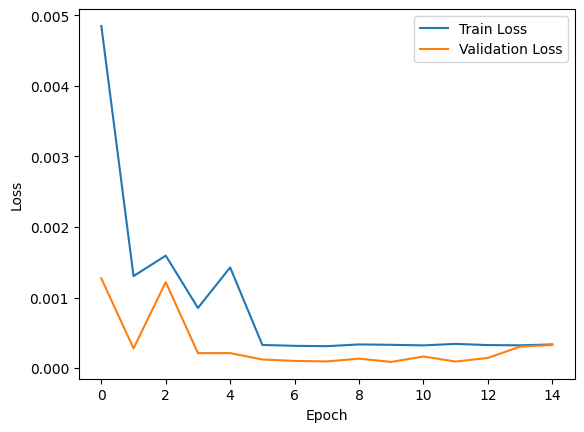

5/5 [==============================] - 1s 42ms/step


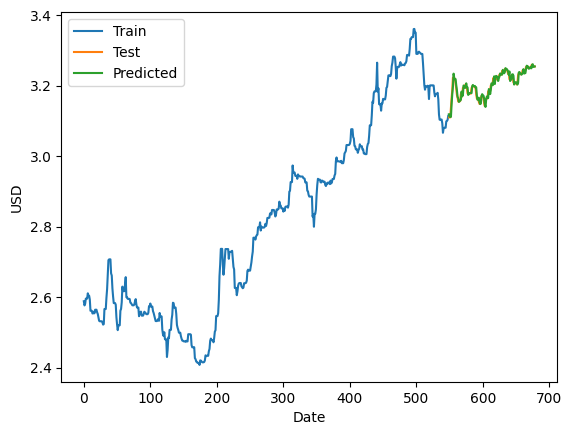

MAE: 0.006339104380458593
medAE: 0.003925681114196777
MSE: 7.894315058365464e-05
MSLE: 4.492786956689088e-06
MAPE: 0.0019822055473923683


In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
data = scaler.fit_transform(df.values.reshape(-1, 1))

time_steps = 32
n_neurons = 64

X, y = [], []
for i in range(len(data) - time_steps):
    X.append(data[i : (i + time_steps), 0])
    y.append(data[i + time_steps, 0])

X, y = np.array(X), np.array(y)

split = int(0.8 * len(X))
X_train, X_test = X[ : split], X[split : ]
y_train, y_test = y[ : split], y[split : ]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(GRU(units = n_neurons, return_sequences = True, input_shape = (time_steps, 1), activation = 'elu'))
model.add(GRU(units = n_neurons, return_sequences = True, activation = 'elu'))
model.add(GRU(units = n_neurons, return_sequences = True, activation = 'elu'))
model.add(GRU(units = n_neurons, activation = 'elu'))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 3, min_lr = 0.0001)

history = model.fit(X_train, y_train, epochs = 75, batch_size = 1, validation_data = (X_test, y_test), callbacks = [early_stopping, reduce_lr])

plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

predicted_values = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(df.index[ : -len(y_test)], df.iloc[ : -len(y_test)], label = 'Train')
plt.plot(df.index[-len(y_test) : ], df.iloc[-len(y_test) : ], label = 'Test')
plt.plot(df.index[-len(predicted_values) : ], predicted_values, label = 'Predicted')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

get_metrics(y_test, predicted_values.flatten())

Epoch 1/75
517/517 [==============================] - 46s 58ms/step - loss: 0.0075 - mae: 0.0583 - val_loss: 3.4382e-04 - val_mae: 0.0152 - lr: 0.0010
Epoch 2/75
517/517 [==============================] - 29s 56ms/step - loss: 0.0027 - mae: 0.0397 - val_loss: 3.9090e-04 - val_mae: 0.0170 - lr: 0.0010
Epoch 3/75
517/517 [==============================] - 28s 55ms/step - loss: 0.0017 - mae: 0.0310 - val_loss: 1.5567e-04 - val_mae: 0.0099 - lr: 0.0010
Epoch 4/75
517/517 [==============================] - 29s 55ms/step - loss: 0.0019 - mae: 0.0315 - val_loss: 3.7879e-04 - val_mae: 0.0170 - lr: 0.0010
Epoch 5/75
517/517 [==============================] - 29s 55ms/step - loss: 0.0011 - mae: 0.0238 - val_loss: 0.0020 - val_mae: 0.0440 - lr: 0.0010
Epoch 6/75
517/517 [==============================] - 28s 55ms/step - loss: 7.4611e-04 - mae: 0.0209 - val_loss: 0.0038 - val_mae: 0.0607 - lr: 0.0010
Epoch 7/75
517/517 [==============================] - 29s 56ms/step - loss: 3.2529e-04 - mae: 0.01

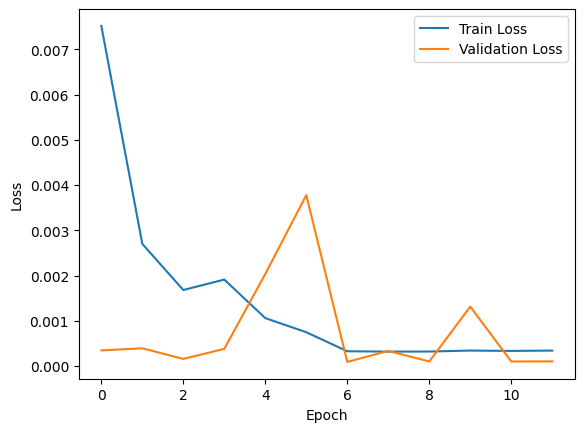

5/5 [==============================] - 2s 36ms/step


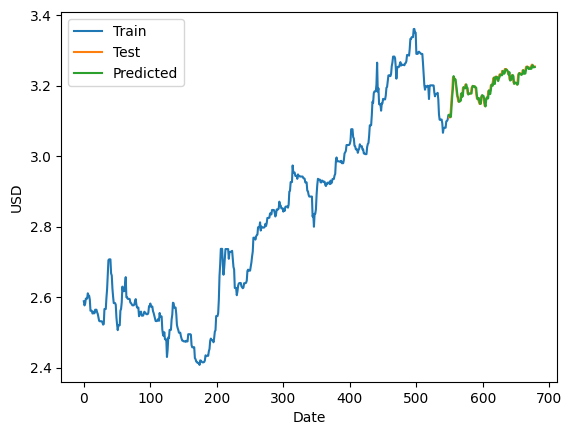

MAE: 0.006201533135026693
medAE: 0.0031784772872924805
MSE: 8.119611447909847e-05
MSLE: 4.623927907232428e-06
MAPE: 0.0019387025386095047


In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
data = scaler.fit_transform(df.values.reshape(-1, 1))

time_steps = 32
n_neurons = 32

X, y = [], []
for i in range(len(data) - time_steps):
    X.append(data[i : (i + time_steps), 0])
    y.append(data[i + time_steps, 0])

X, y = np.array(X), np.array(y)

split = int(0.8 * len(X))
X_train, X_test = X[ : split], X[split : ]
y_train, y_test = y[ : split], y[split : ]
X_train_rev = X_train[:, ::-1]
X_test_rev = X_test[:, ::-1]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train_rev = X_train_rev.reshape(X_train_rev.shape[0], X_train_rev.shape[1], 1)
X_test_rev = X_test_rev.reshape(X_test_rev.shape[0], X_test_rev.shape[1], 1)

inp1 = Input(shape = ((time_steps, 1)))
direct = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(inp1)
direct = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(direct)
direct = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(direct)
direct = GRU(units = n_neurons, activation = 'elu')(direct)

inp2 = Input(shape = ((time_steps, 1)))
reverse = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(inp2)
reverse = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(reverse)
reverse = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(reverse)
reverse = GRU(units = n_neurons, activation = 'elu')(reverse)

concat = concatenate([direct, reverse])
concat = Dense(n_neurons * 16, activation = 'elu')(concat)
output = Dense(units = 1)(concat)

model = Model(inputs = [inp1, inp2], outputs = [output])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 3, min_lr = 0.0001)

history = model.fit([X_train, X_train_rev], y_train, epochs = 75, batch_size = 1,
                    validation_data = ([X_test, X_test_rev], y_test), callbacks = [early_stopping, reduce_lr])

plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

predicted_values = model.predict([X_test, X_test_rev])
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(df.index[ : -len(y_test)], df.iloc[ : -len(y_test)], label = 'Train')
plt.plot(df.index[-len(y_test) : ], df.iloc[-len(y_test) : ], label = 'Test')
plt.plot(df.index[-len(predicted_values) : ], predicted_values, label = 'Predicted')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

get_metrics(y_test, predicted_values.flatten())

Epoch 1/75
517/517 [==============================] - 42s 58ms/step - loss: 0.0174 - mae: 0.0925 - val_loss: 0.0323 - val_mae: 0.1783 - lr: 0.0010
Epoch 2/75
517/517 [==============================] - 29s 55ms/step - loss: 0.0041 - mae: 0.0478 - val_loss: 0.0201 - val_mae: 0.1408 - lr: 0.0010
Epoch 3/75
517/517 [==============================] - 29s 56ms/step - loss: 0.0019 - mae: 0.0329 - val_loss: 0.0014 - val_mae: 0.0355 - lr: 0.0010
Epoch 4/75
517/517 [==============================] - 31s 60ms/step - loss: 8.7367e-04 - mae: 0.0227 - val_loss: 0.0012 - val_mae: 0.0339 - lr: 0.0010
Epoch 5/75
517/517 [==============================] - 33s 63ms/step - loss: 9.5253e-04 - mae: 0.0233 - val_loss: 1.1546e-04 - val_mae: 0.0088 - lr: 0.0010
Epoch 6/75
517/517 [==============================] - 33s 64ms/step - loss: 9.4872e-04 - mae: 0.0236 - val_loss: 0.0017 - val_mae: 0.0402 - lr: 0.0010
Epoch 7/75
517/517 [==============================] - 33s 64ms/step - loss: 0.0037 - mae: 0.0364 - val

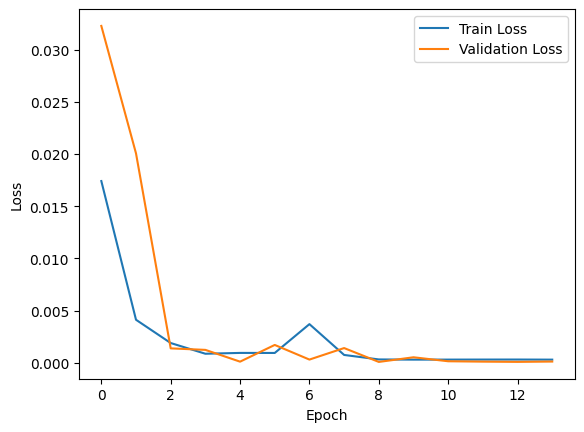

5/5 [==============================] - 2s 19ms/step


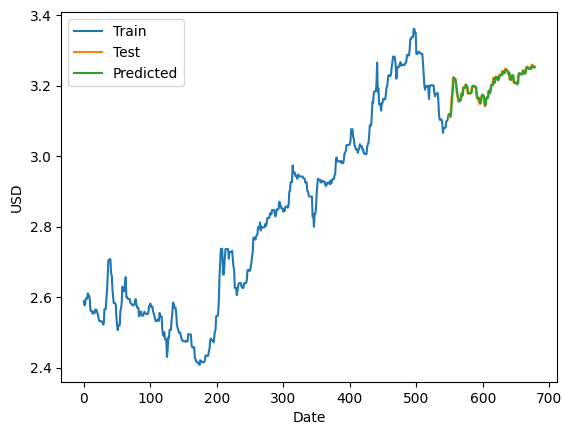

MAE: 0.0063683162443339825
medAE: 0.003647446632385254
MSE: 8.201551827369258e-05
MSLE: 4.671033366321353e-06
MAPE: 0.0019921637140214443


In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
data = scaler.fit_transform(df.values.reshape(-1, 1))

time_steps = 32
n_neurons = 32

X, y = [], []
for i in range(len(data) - time_steps):
    X.append(data[i : (i + time_steps), 0])
    y.append(data[i + time_steps, 0])

X, y = np.array(X), np.array(y)

split = int(0.8 * len(X))
X_train, X_test = X[ : split], X[split : ]
y_train, y_test = y[ : split], y[split : ]
X_train_rev = X_train[:, ::-1]
X_test_rev = X_test[:, ::-1]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train_rev = X_train_rev.reshape(X_train_rev.shape[0], X_train_rev.shape[1], 1)
X_test_rev = X_test_rev.reshape(X_test_rev.shape[0], X_test_rev.shape[1], 1)

inp1 = Input(shape = ((time_steps, 1)))
direct = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(inp1)
direct = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(direct)
direct = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(direct)
direct = GRU(units = n_neurons, activation = 'elu')(direct)

attention_start = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(inp1)
attention = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(attention_start)
attention = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(attention)
attention = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(attention)
attention = Attention()([attention_start, attention])
attention = Flatten()(attention)

inp2 = Input(shape = ((time_steps, 1)))
reverse = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(inp2)
reverse = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(reverse)
reverse = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(reverse)
reverse = GRU(units = n_neurons, activation = 'elu')(reverse)

concat = concatenate([direct, reverse, attention])
concat = Dense(n_neurons * 16, activation = 'elu')(concat)
output = Dense(units = 1)(concat)

model = Model(inputs = [inp1, inp2], outputs = [output])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 3, min_lr = 0.0001)

history = model.fit([X_train, X_train_rev], y_train, epochs = 75, batch_size = 1,
                    validation_data = ([X_test, X_test_rev], y_test), callbacks = [early_stopping, reduce_lr])

plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

predicted_values = model.predict([X_test, X_test_rev])
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(df.index[ : -len(y_test)], df.iloc[ : -len(y_test)], label = 'Train')
plt.plot(df.index[-len(y_test) : ], df.iloc[-len(y_test) : ], label = 'Test')
plt.plot(df.index[-len(predicted_values) : ], predicted_values, label = 'Predicted')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

get_metrics(y_test, predicted_values.flatten())

In [15]:
class USDmodel:
    def __init__(self, time_steps = 32, n_neurons = 32, n_layers = 4, dense_neurons = 32 * 16):
        self.time_steps = time_steps
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        self.dense_neurons = dense_neurons


    def get_params(self, deep = True):
        return {
            'n_layers': self.n_layers,
            'n_neurons': self.n_neurons,
            'dense_neurons': self.dense_neurons,
            'time_steps': self.time_steps
        }


    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


    def create_model(self):
        inp1 = Input(shape = ((self.time_steps, 1)))
        if self.n_layers == 1:
            direct = GRU(units = self.n_neurons, return_sequences = False, activation = 'elu')(inp1)
        else:
            direct = GRU(units = self.n_neurons, return_sequences = True, activation = 'elu')(inp1)
            for i in range(self.n_layers - 2):
                direct = GRU(units = self.n_neurons, return_sequences = True, activation = 'elu')(direct)

            direct = GRU(units = self.n_neurons, return_sequences = False, activation = 'elu')(direct)


        inp2 = Input(shape = ((self.time_steps, 1)))
        if self.n_layers == 1:
            reverse = GRU(units = self.n_neurons, return_sequences = False, activation = 'elu')(inp2)
        else:
            reverse = GRU(units = self.n_neurons, return_sequences = True, activation = 'elu')(inp2)
            for i in range(self.n_layers - 2):
                reverse = GRU(units = self.n_neurons, return_sequences = True, activation = 'elu')(reverse)

            reverse = GRU(units = self.n_neurons, return_sequences = False, activation = 'elu')(reverse)


        concat = concatenate([direct, reverse])
        concat = Dense(self.dense_neurons, activation = 'elu')(concat)
        output = Dense(units = 1)(concat)

        self.model = Model(inputs = [inp1, inp2], outputs = [output])
        self.model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])


    def fit(self, X, y):
        print(self.get_params())

        data = df
        data = data.values.reshape(-1, 1)

        self.scaler = MinMaxScaler()
        data = self.scaler.fit_transform(data)

        X, y = [], []
        for i in range(len(data) - self.time_steps):
            X.append(data[i : (i + self.time_steps), 0])
            y.append(data[i + self.time_steps, 0])

        X, y = np.array(X), np.array(y)

        split = int(0.8 * len(X))
        self.X_train, self.X_test = X[ : split], X[split : ]
        self.y_train, self.y_test = y[ : split], y[split : ]
        self.X_train_rev = self.X_train[:, ::-1]
        self.X_test_rev = self.X_test[:, ::-1]

        self.X_train = self.X_train.reshape(self.X_train.shape[0], self.X_train.shape[1], 1)
        self.X_test = self.X_test.reshape(self.X_test.shape[0], self.X_test.shape[1], 1)

        self.X_train_rev = self.X_train_rev.reshape(self.X_train_rev.shape[0], self.X_train_rev.shape[1], 1)
        self.X_test_rev = self.X_test_rev.reshape(self.X_test_rev.shape[0], self.X_test_rev.shape[1], 1)

        self.create_model()
        early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
        reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 3, min_lr = 0.0001)
        self.model.fit([self.X_train, self.X_train_rev],
                  self.y_train,
                  epochs = 50,
                  batch_size = 1,
                  validation_data = [[self.X_test, self.X_test_rev], self.y_test],
                  callbacks = [early_stopping, reduce_lr],
                  verbose = False)

        predicted_values = self.model.predict([self.X_train, self.X_train_rev], verbose = False)
        predicted_values = self.scaler.inverse_transform(predicted_values)
        y_train = self.scaler.inverse_transform(self.y_train.reshape(-1, 1))

        print(mean_absolute_percentage_error(y_train, predicted_values.flatten()), "\n")
        return -mean_absolute_percentage_error(y_train, predicted_values.flatten())


    def score(self, X, y):
        predicted_values = self.model.predict([self.X_test, self.X_test_rev], verbose = False)
        predicted_values = self.scaler.inverse_transform(predicted_values)
        y_test = self.scaler.inverse_transform(self.y_test.reshape(-1, 1))
        return -mean_absolute_percentage_error(y_test, predicted_values.flatten())

In [17]:
opt = RandomizedSearchCV(
    USDmodel(), {
         'time_steps': np.arange(16, 128, 8),
         'n_neurons': np.arange(16, 64, 8),
         'n_layers': np.arange(1, 6, 1),
         'dense_neurons': np.arange(256, 1024, 32)
    },
    n_iter = 32,
    cv = 2,
    random_state = 1212
)

opt.fit(np.zeros((10, )), np.zeros(10))
print("\nBest parameters found: ", opt.best_params_)

{'n_layers': 2, 'n_neurons': 32, 'dense_neurons': 960, 'time_steps': 16}
0.0047629705794266595 

{'n_layers': 2, 'n_neurons': 32, 'dense_neurons': 960, 'time_steps': 16}
0.004283077677443974 

{'n_layers': 1, 'n_neurons': 16, 'dense_neurons': 384, 'time_steps': 96}
0.004258321783614624 

{'n_layers': 1, 'n_neurons': 16, 'dense_neurons': 384, 'time_steps': 96}
0.004949064624046446 

{'n_layers': 1, 'n_neurons': 40, 'dense_neurons': 832, 'time_steps': 48}
0.004070466253980987 

{'n_layers': 1, 'n_neurons': 40, 'dense_neurons': 832, 'time_steps': 48}
0.007695547183729874 

{'n_layers': 2, 'n_neurons': 24, 'dense_neurons': 448, 'time_steps': 80}
0.004639548022435241 

{'n_layers': 2, 'n_neurons': 24, 'dense_neurons': 448, 'time_steps': 80}
0.005447058952007332 

{'n_layers': 4, 'n_neurons': 32, 'dense_neurons': 320, 'time_steps': 56}
0.006338610131866041 

{'n_layers': 4, 'n_neurons': 32, 'dense_neurons': 320, 'time_steps': 56}
0.005932615956193676 

{'n_layers': 4, 'n_neurons': 24, 'dense

In [18]:
cv_results = opt.cv_results_
for i in range(len(cv_results['params'])):
    print(f"Iteration {i + 1} - Parameters: {cv_results['params'][i]}, Mean Test Score: {cv_results['mean_test_score'][i]}\n")

Iteration 1 - Parameters: {'time_steps': 16, 'n_neurons': 32, 'n_layers': 2, 'dense_neurons': 960}, Mean Test Score: -0.0022996939166950235

Iteration 2 - Parameters: {'time_steps': 96, 'n_neurons': 16, 'n_layers': 1, 'dense_neurons': 384}, Mean Test Score: -0.002698184605891714

Iteration 3 - Parameters: {'time_steps': 48, 'n_neurons': 40, 'n_layers': 1, 'dense_neurons': 832}, Mean Test Score: -0.002499325174684531

Iteration 4 - Parameters: {'time_steps': 80, 'n_neurons': 24, 'n_layers': 2, 'dense_neurons': 448}, Mean Test Score: -0.0023977060345488728

Iteration 5 - Parameters: {'time_steps': 56, 'n_neurons': 32, 'n_layers': 4, 'dense_neurons': 320}, Mean Test Score: -0.002849177053336647

Iteration 6 - Parameters: {'time_steps': 72, 'n_neurons': 24, 'n_layers': 4, 'dense_neurons': 480}, Mean Test Score: -0.0026733757289679663

Iteration 7 - Parameters: {'time_steps': 40, 'n_neurons': 40, 'n_layers': 5, 'dense_neurons': 352}, Mean Test Score: -0.003141421674688159

Iteration 8 - Par

Epoch 1/75
517/517 [==============================] - 86s 124ms/step - loss: 0.0120 - mae: 0.0791 - val_loss: 0.0069 - val_mae: 0.0811 - lr: 0.0010
Epoch 2/75
517/517 [==============================] - 51s 99ms/step - loss: 0.0029 - mae: 0.0407 - val_loss: 3.1683e-04 - val_mae: 0.0146 - lr: 0.0010
Epoch 3/75
517/517 [==============================] - 35s 68ms/step - loss: 0.0016 - mae: 0.0300 - val_loss: 1.1680e-04 - val_mae: 0.0081 - lr: 0.0010
Epoch 4/75
517/517 [==============================] - 35s 67ms/step - loss: 0.0013 - mae: 0.0260 - val_loss: 0.0029 - val_mae: 0.0530 - lr: 0.0010
Epoch 5/75
517/517 [==============================] - 39s 75ms/step - loss: 0.0014 - mae: 0.0281 - val_loss: 0.0038 - val_mae: 0.0609 - lr: 0.0010
Epoch 6/75
517/517 [==============================] - 36s 70ms/step - loss: 8.0724e-04 - mae: 0.0220 - val_loss: 3.3020e-04 - val_mae: 0.0165 - lr: 0.0010
Epoch 7/75
517/517 [==============================] - 40s 77ms/step - loss: 3.1069e-04 - mae: 0.0119 

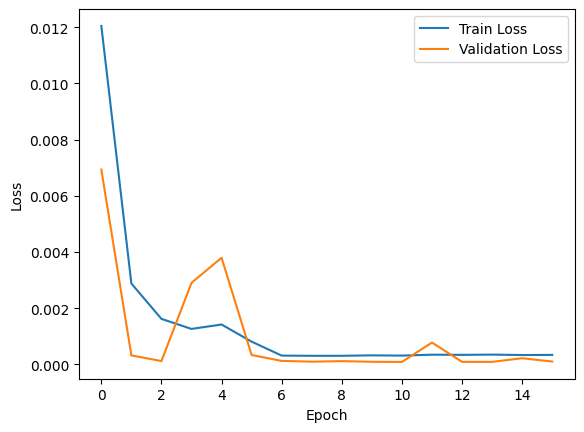

5/5 [==============================] - 2s 27ms/step


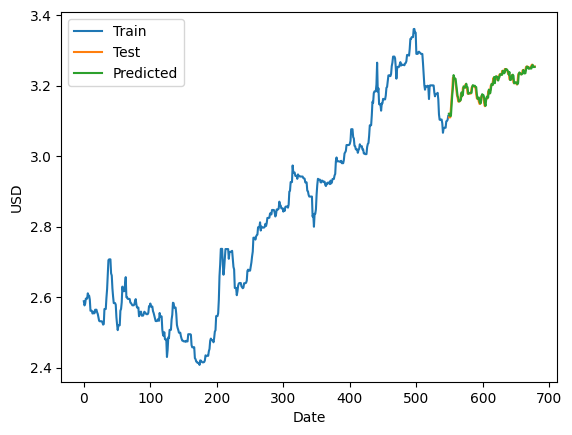

MAE: 0.006277509965002537
medAE: 0.003472447395324707
MSE: 7.751747034490108e-05
MSLE: 4.413529495650437e-06
MAPE: 0.001964130438864231


In [23]:
scaler = MinMaxScaler(feature_range = (0, 1))
data = scaler.fit_transform(df.values.reshape(-1, 1))

time_steps = 32
n_neurons = 32

X, y = [], []
for i in range(len(data) - time_steps):
    X.append(data[i : (i + time_steps), 0])
    y.append(data[i + time_steps, 0])

X, y = np.array(X), np.array(y)

split = int(0.8 * len(X))
X_train, X_test = X[ : split], X[split : ]
y_train, y_test = y[ : split], y[split : ]
X_train_rev = X_train[:, ::-1]
X_test_rev = X_test[:, ::-1]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train_rev = X_train_rev.reshape(X_train_rev.shape[0], X_train_rev.shape[1], 1)
X_test_rev = X_test_rev.reshape(X_test_rev.shape[0], X_test_rev.shape[1], 1)

inp1 = Input(shape = ((time_steps, 1)))
direct = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(inp1)
direct = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(direct)
direct = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(direct)
direct = GRU(units = n_neurons, activation = 'elu')(direct)

attention_start = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(inp1)
attention = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(attention_start)
attention = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(attention)
attention = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(attention)
attention = Attention()([attention_start, attention])
attention = Flatten()(attention)

inp2 = Input(shape = ((time_steps, 1)))
reverse = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(inp2)
reverse = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(reverse)
reverse = GRU(units = n_neurons, return_sequences = True, activation = 'elu')(reverse)
reverse = GRU(units = n_neurons, activation = 'elu')(reverse)

concat = concatenate([direct, reverse, attention])
concat = Dense(n_neurons * 16, activation = 'elu')(concat)
output = Dense(units = 1)(concat)

model = Model(inputs = [inp1, inp2], outputs = [output])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 3, min_lr = 0.0001)

history = model.fit([X_train, X_train_rev], y_train, epochs = 75, batch_size = 1,
                    validation_data = ([X_test, X_test_rev], y_test), callbacks = [early_stopping, reduce_lr])

plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

predicted_values = model.predict([X_test, X_test_rev])
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(df.index[ : -len(y_test)], df.iloc[ : -len(y_test)], label = 'Train')
plt.plot(df.index[-len(y_test) : ], df.iloc[-len(y_test) : ], label = 'Test')
plt.plot(df.index[-len(predicted_values) : ], predicted_values, label = 'Predicted')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

get_metrics(y_test, predicted_values.flatten())

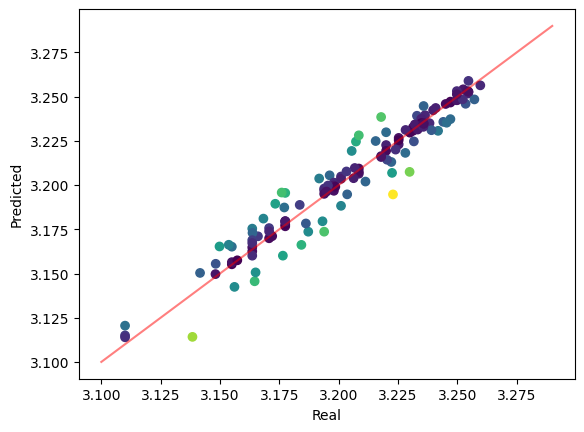

In [41]:
plt.plot(np.arange(3.10, 3.3, 0.01), np.arange(3.10, 3.3, 0.01), c = 'red', alpha = 0.5)
plt.scatter(y_test, predicted_values, 
            c = np.abs(y_test - predicted_values), cmap = 'viridis')

plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()